# 시계열 데이터의 이해
- 시간의 흐름에 따라 관찰된 값(미래의 값 예측)

## 시계열 분석의 가정
### 정상성

- 평균과 분산이 일정하고 공분산도 단지 시차에만 의존하고 특정 시점에는 의존하지 않은 상태
- 

In [2]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller

In [3]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [4]:
origin = load_data('air_passengers')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata
데이터셋 크기: (144, 2)
열 개수: 2
행 개수: 144
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## 데이터 전처리
- 시계열 분석에서 날짜/시간값은 인덱스로 존재하여야 함

In [5]:
df1 = origin.set_index('Month')
df1

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## 데이터 정상성 확인
### 시각화를 통한 확인

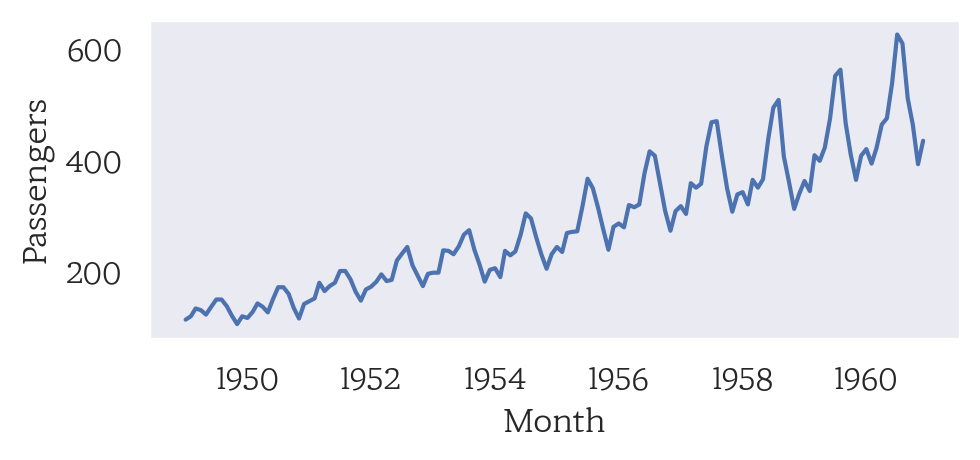

In [6]:
# 시계열 데이터의 파영이 평행하게 진행되어야 한다.
# x축: 시간 데이터, y축: 연속성 데이터

width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(data = df1, x= df1.index, y = 'Passengers')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

## ADF 테스트
- 시계열 데이터 정상성 여부 판단하기 위한 검정

In [7]:
ar = adfuller(df1['Passengers'])
ar

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values): ')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))
print('데이터 정상성 여부:', '정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')

검정통계량(ADF Statistic): 0.815369
유의수준(p-value): 0.991880
최적차수(num of lags): 13.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values): 
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부: 정상성 충족 안함


## 차분
- 관측값과 바로 이전 관측값 사이의 차이
- 정상성 확보를 위해 많이 사용

### 1차 차분
- 1번째 값은 결측치가 발생함 -> 제거해야 함


In [8]:
df2 = df1.diff().dropna()
df2

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


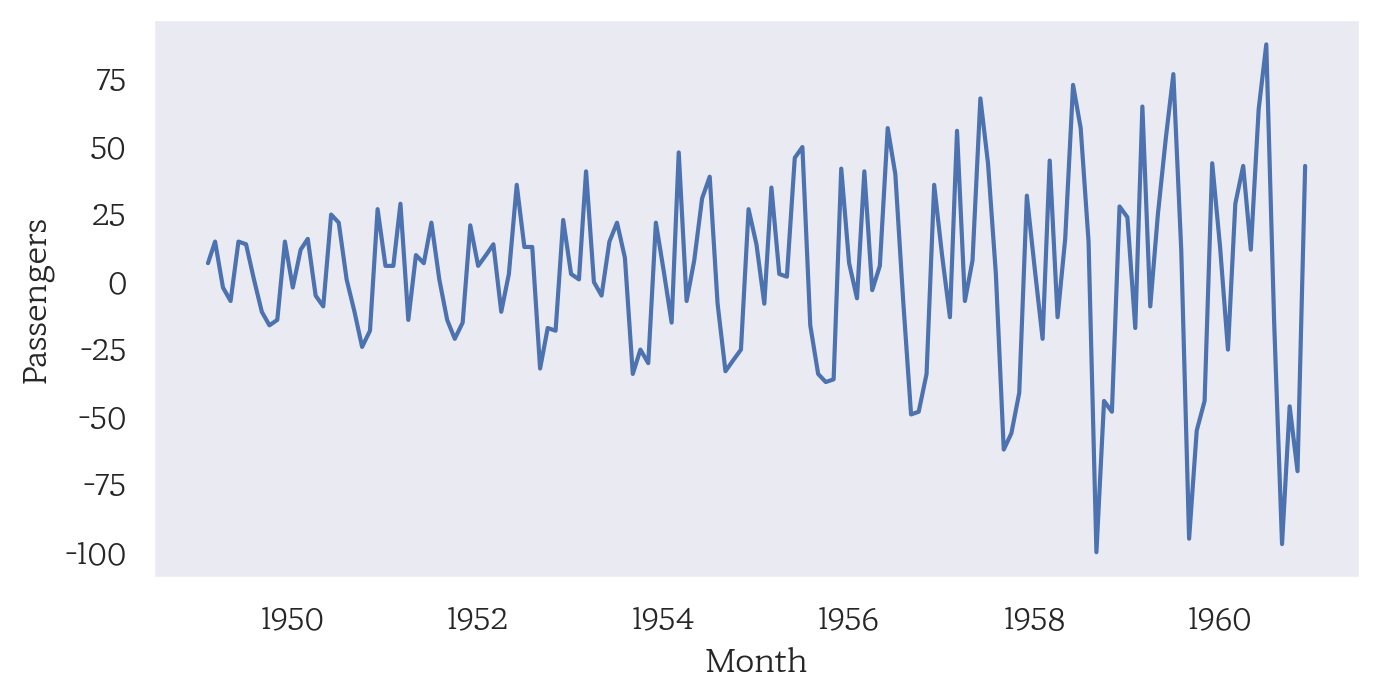

검정통계량(ADF Statistic): -2.829267
유의수준(p-value): 0.054213
최적차수(num of lags): 12.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values): 
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부: 정상성 충족 안함


In [9]:
width_px = 1400
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(data = df2, x= df2.index, y = 'Passengers')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

ar = adfuller(df2['Passengers'])
ar

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values): ')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))
print('데이터 정상성 여부:', '정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')

### 2차 차분

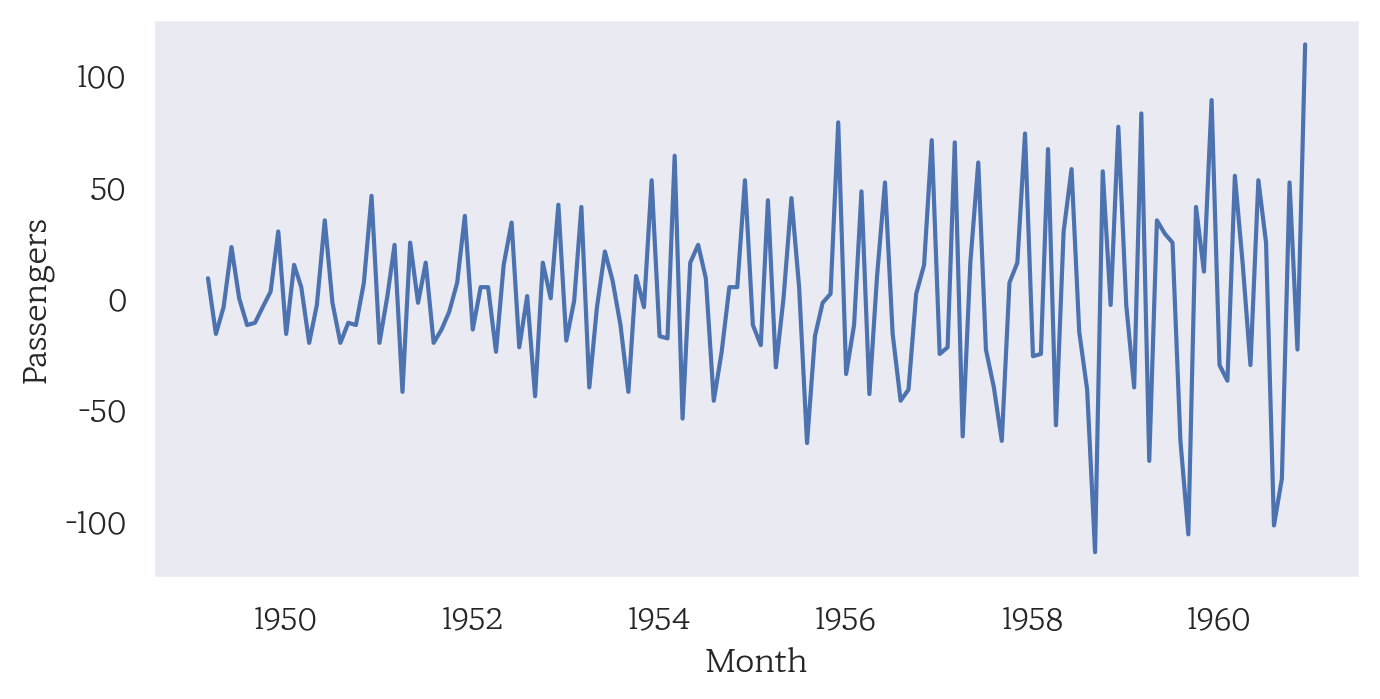

검정통계량(ADF Statistic): -16.384232
유의수준(p-value): 0.000000
최적차수(num of lags): 11.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values): 
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부: 정상성 충족


In [10]:
df3 = df2.diff().dropna()

width_px = 1400
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(data = df3, x= df3.index, y = 'Passengers')

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

ar = adfuller(df3['Passengers'])
ar

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values): ')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))
print('데이터 정상성 여부:', '정상성 충족' if ar[1] <= 0.05 else '정상성 충족 안함')

## 시계열 데이터 탐색
### 준비작업

In [11]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [13]:
origin = load_data('air_passengers')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata
데이터셋 크기: (144, 2)
열 개수: 2
행 개수: 144
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
df1 = origin.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


==== 0차 차분====


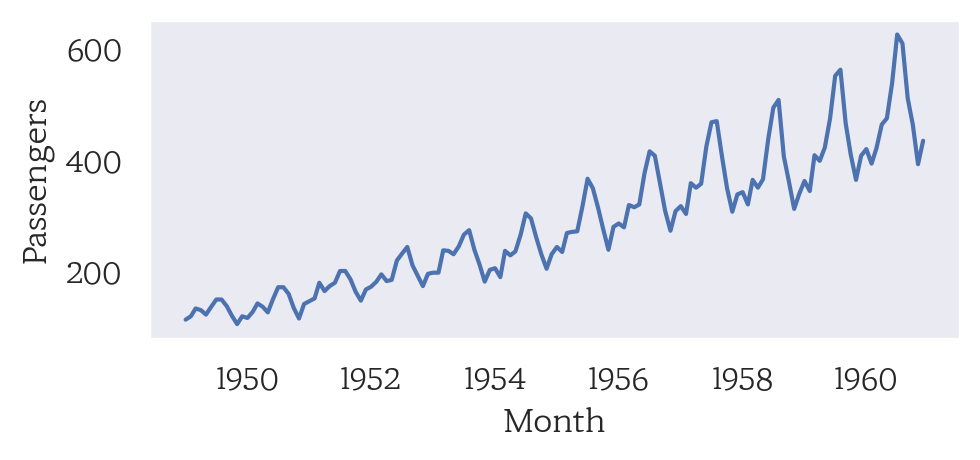

,0
ADF Statistic,0.815369
p-value,0.99188
num of lags,13
num of observations,130
result,False


==== 1차 차분====


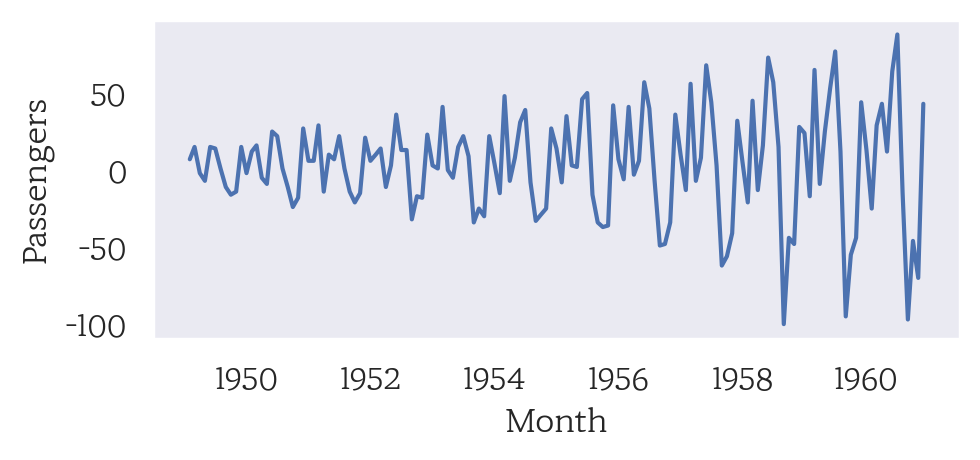

,0
ADF Statistic,-2.829267
p-value,0.054213
num of lags,12
num of observations,130
result,False


==== 2차 차분====


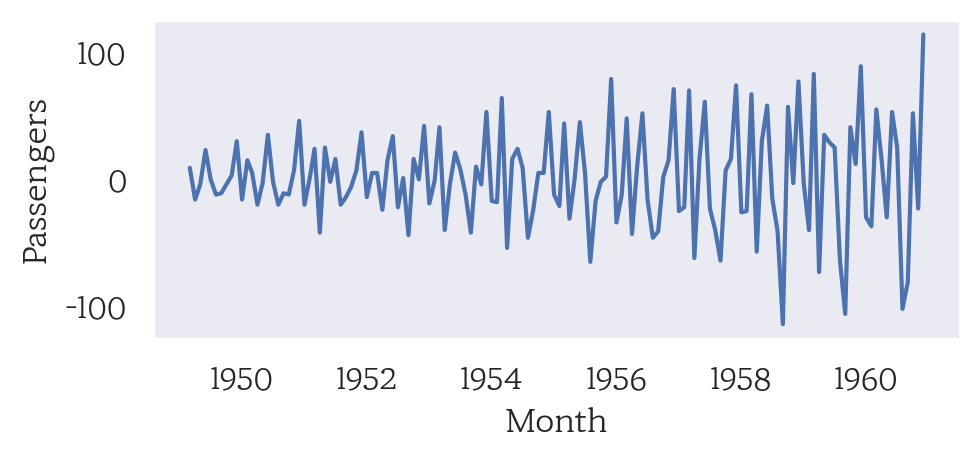

,0
ADF Statistic,-16.384232
p-value,0.0
num of lags,11
num of observations,130
result,True


In [15]:
diff_df = df1.copy()
yname = 'Passengers'
count = 0

while True:
    print(f'==== {count}차 차분====')
    # 시계열 그래프
    width_px = 1000
    height_px = 480
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
    
    # 그래프 그리기, seaborn 사용
    sb.lineplot(data = diff_df, x= diff_df.index, y = yname)
    
    # 그래프 꾸미기
    ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김   
    # 출력
    plt.grid()
    plt.tight_layout()
    plt.show()
    plt.close()
    
    ar = adfuller(diff_df[yname])
    ar_dict = {
        'ADF Statistic': ar[0],
        'p-value': ar[1],
        'num of lags': ar[2],
        'num of observations': ar[3]
    }

    ar_dict['result'] = True if ar[1] <= 0.05 else False

    adf = DataFrame([ar_dict]).T
    display(adf)

    # 정상성 충족이라면 반복 중단
    if ar[1] <= 0.05:
        break
    # 정상성 충족 안되면 차분 수행 후 다시 수행
    count += 1
    diff_df = diff_df.diff().dropna()

## 평균이동법
### 차분되지 않은 원본에 대한 3개월, 6개월, 9개월 평균

In [16]:
df2 = df1.copy()
df2['rolling3'] = df2['Passengers'].rolling(3).mean()
df2['rolling6'] = df2['Passengers'].rolling(6).mean()
df2['rolling9'] = df2['Passengers'].rolling(9).mean()
df2.head(10)

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
1949-06-01,135,128.333333,124.500000,NaN
1949-07-01,148,134.666667,130.500000,NaN
1949-08-01,148,143.666667,135.500000,NaN
1949-09-01,136,144.000000,136.166667,131.000000


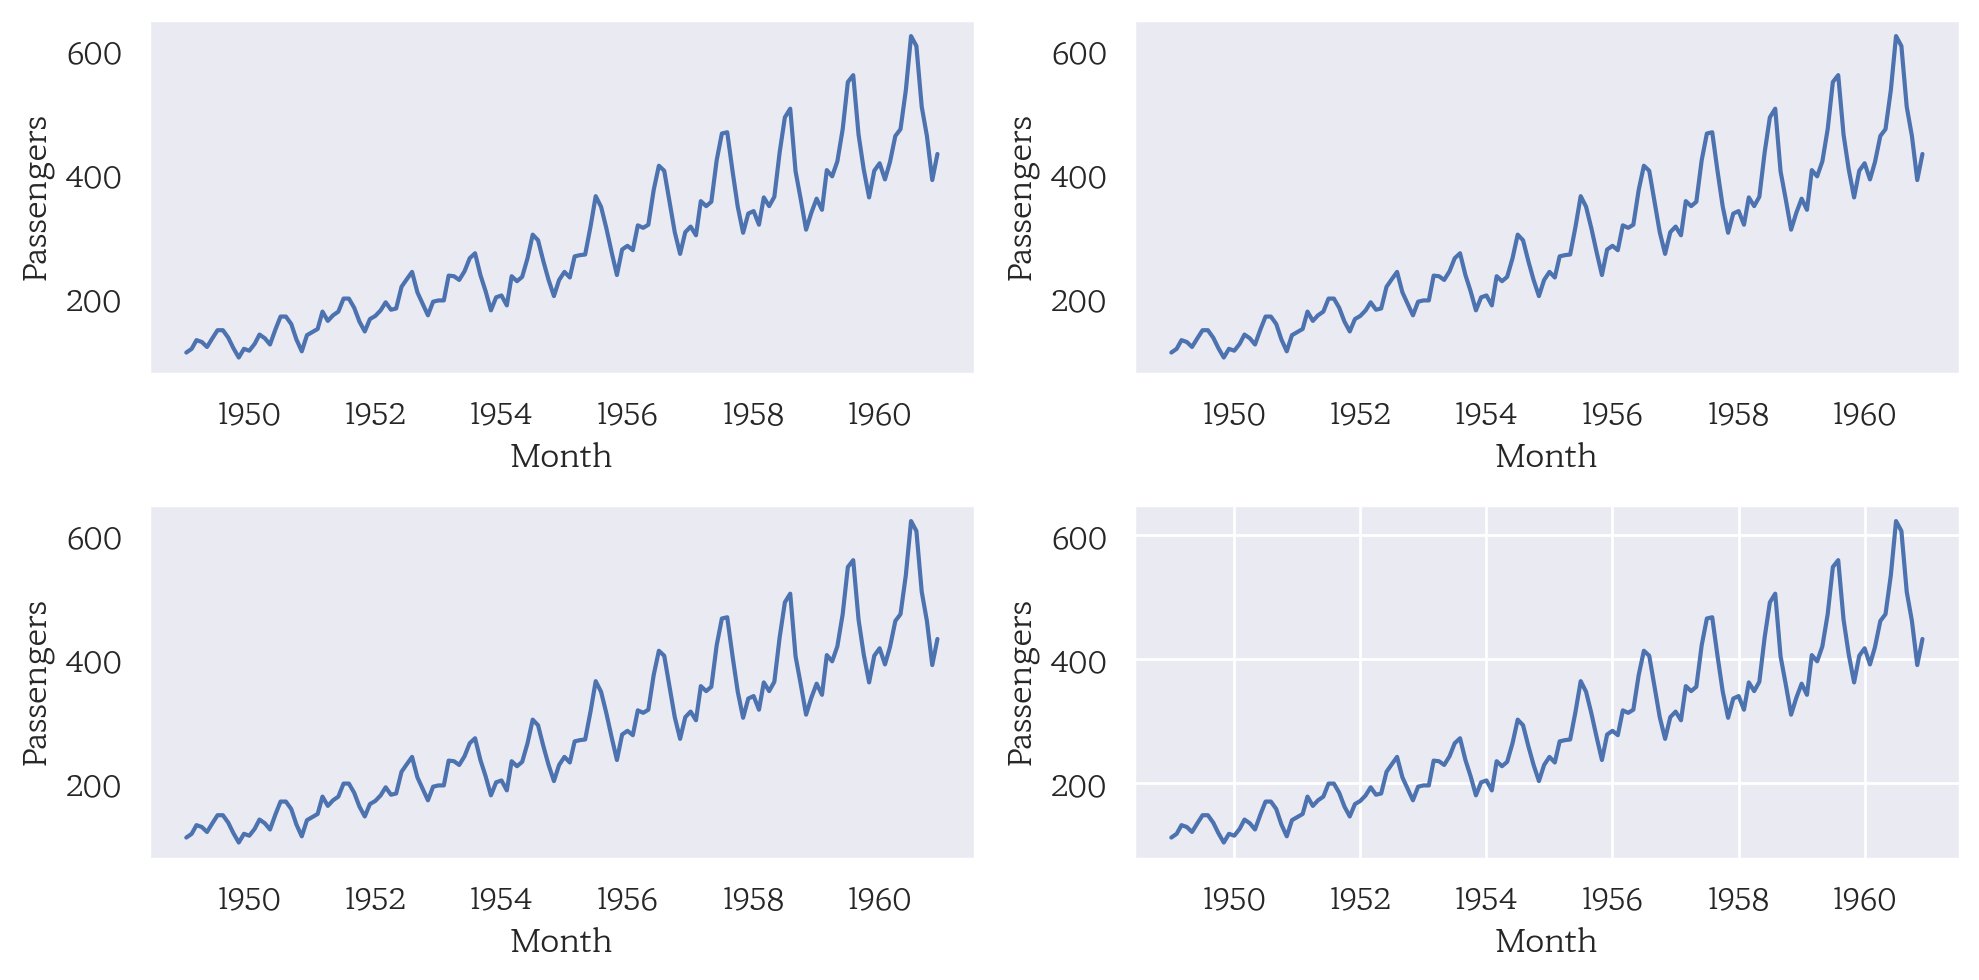

In [17]:
width_px = 2000
height_px =1000
rows = 2
cols = 2
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(data = df2, x= df2.index, y = 'Passengers', ax=ax[0][0])
sb.lineplot(data = df2, x= df2.index, y = 'Passengers', ax=ax[0][1])
sb.lineplot(data = df2, x= df2.index, y = 'Passengers', ax=ax[1][0])
sb.lineplot(data = df2, x= df2.index, y = 'Passengers', ax=ax[1][1])           

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()


In [18]:
df3 = diff_df.copy()
df3['rolling3'] = df3['Passengers'].rolling(3).mean()
df3['rolling6'] = df3['Passengers'].rolling(6).mean()
df3['rolling9'] = df3['Passengers'].rolling(9).mean()
df3.head(10)

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-03-01,8.0,NaN,NaN,NaN
1949-04-01,-17.0,NaN,NaN,NaN
1949-05-01,-5.0,-4.666667,NaN,NaN
1949-06-01,22.0,0.000000,NaN,NaN
1949-07-01,-1.0,5.333333,NaN,NaN
1949-08-01,-13.0,2.666667,-1.000000,NaN
1949-09-01,-12.0,-8.666667,-4.333333,NaN
1949-10-01,-5.0,-10.000000,-2.333333,NaN
1949-11-01,2.0,-5.000000,-1.166667,-2.333333


## 지수평활법

In [19]:
df4 = df1.copy()
df4['ewm3'] = df4['Passengers'].ewm(3).mean()
df4['ewm6'] = df4['Passengers'].ewm(6).mean()
df4['ewm9'] = df4['Passengers'].ewm(9).mean()
df4.head()

,Passengers,ewm3,ewm6,ewm9
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,115.428571,115.230769,115.157895
1949-03-01,132,122.594595,121.700787,121.372694
1949-04-01,129,124.937143,123.966516,123.590579
1949-05-01,121,123.646607,123.177832,122.957974


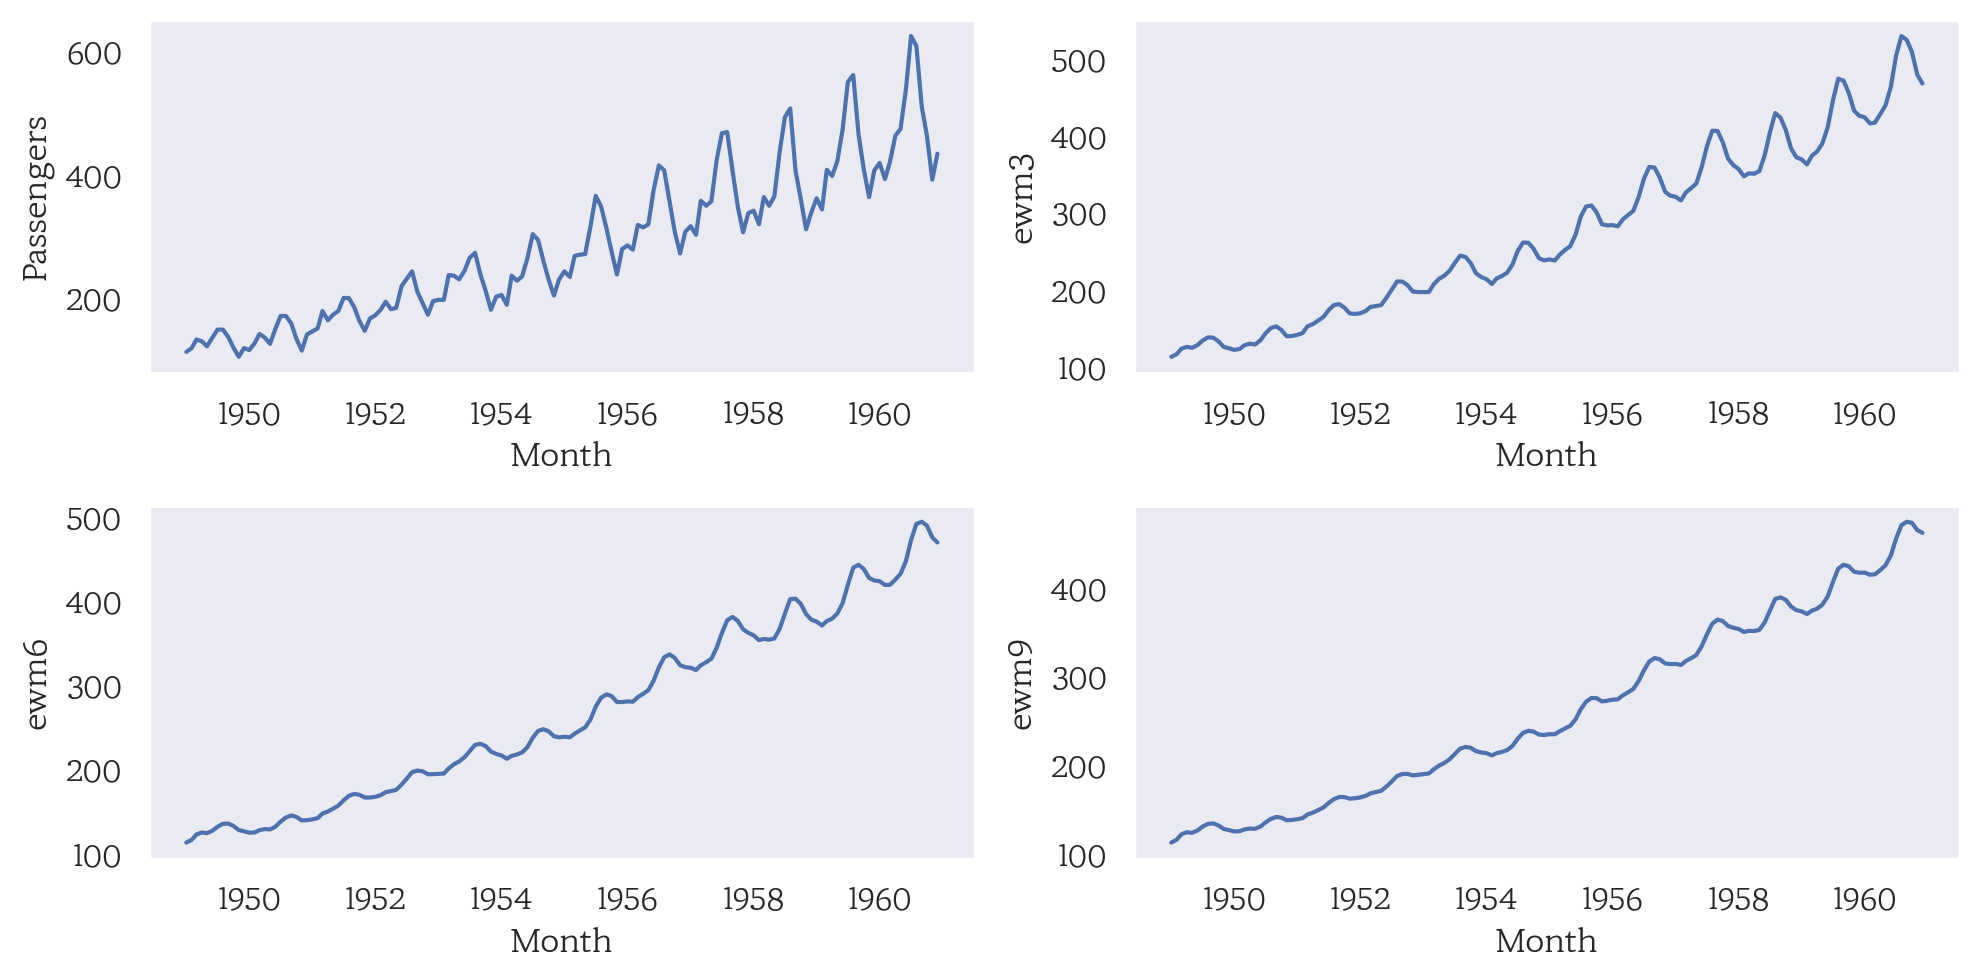

In [20]:
width_px = 2000
height_px =1000
rows = 2
cols = 2
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(data = df4, x= df4.index, y = 'Passengers', ax=ax[0][0])
sb.lineplot(data = df4, x= df4.index, y = 'ewm3', ax=ax[0][1])
sb.lineplot(data = df4, x= df4.index, y = 'ewm6', ax=ax[1][0])
sb.lineplot(data = df4, x= df4.index, y = 'ewm9', ax=ax[1][1])           

# 출력
plt.tight_layout()
plt.show()
plt.close()


### 차분 결과에 대한 지수평활법


<Axes: xlabel='Month', ylabel='ewm9'>

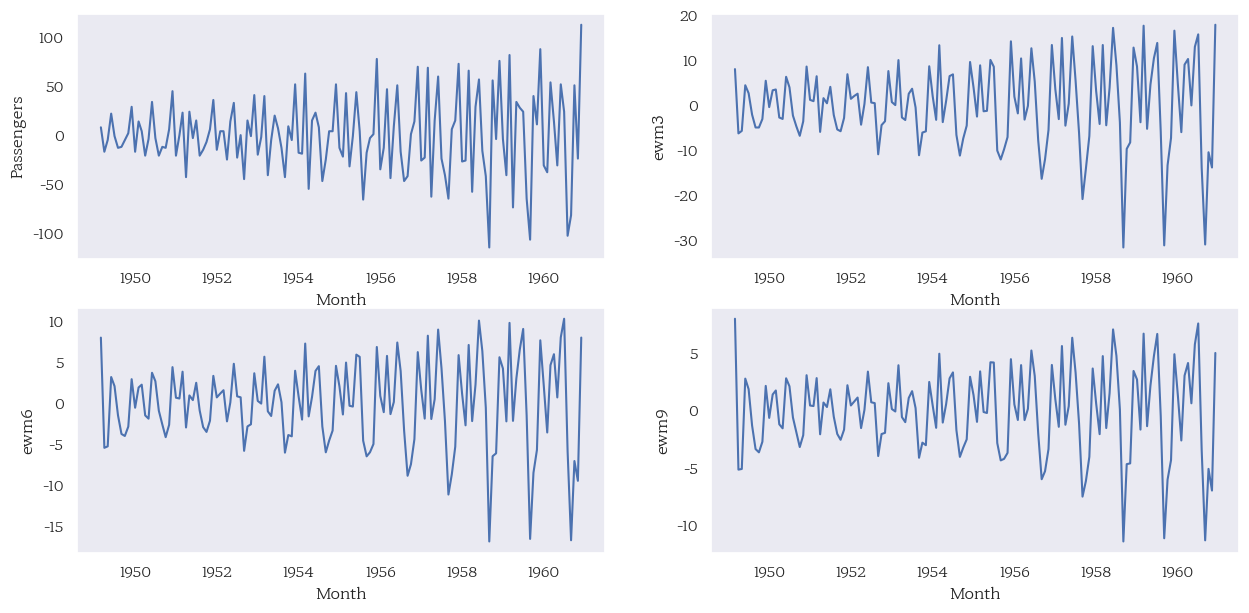

In [21]:
diff_df['ewm3'] = diff_df['Passengers'].ewm(3).mean()
diff_df['ewm6'] = diff_df['Passengers'].ewm(6).mean()
diff_df['ewm9'] = diff_df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,7))

sb.lineplot(data = diff_df, x= diff_df.index, y = 'Passengers', ax=ax1)
sb.lineplot(data = diff_df, x= diff_df.index, y = 'ewm3', ax=ax2)
sb.lineplot(data = diff_df, x= diff_df.index, y = 'ewm6', ax=ax3)
sb.lineplot(data = diff_df, x= diff_df.index, y = 'ewm9', ax=ax4)

### 분해시계열

In [22]:
# model_name = 'additive'  가법 모델
model_name = 'multiplicative' # 승법 모델

# 분해 시계열 객체 생성
sd = seasonal_decompose(df1['Passengers'], model = model_name)

# trend, seasonal, residual 데이터 프레임으로 변환
sd_df = DataFrame({
    'original': sd.observed,
    'trend': sd.trend,
    'seasonal': sd.seasonal,
    'resid': sd.resid
}, index = origin.index)

sd_df

,original,trend,seasonal,resid
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
139,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN


### 분해 시계열 시각화

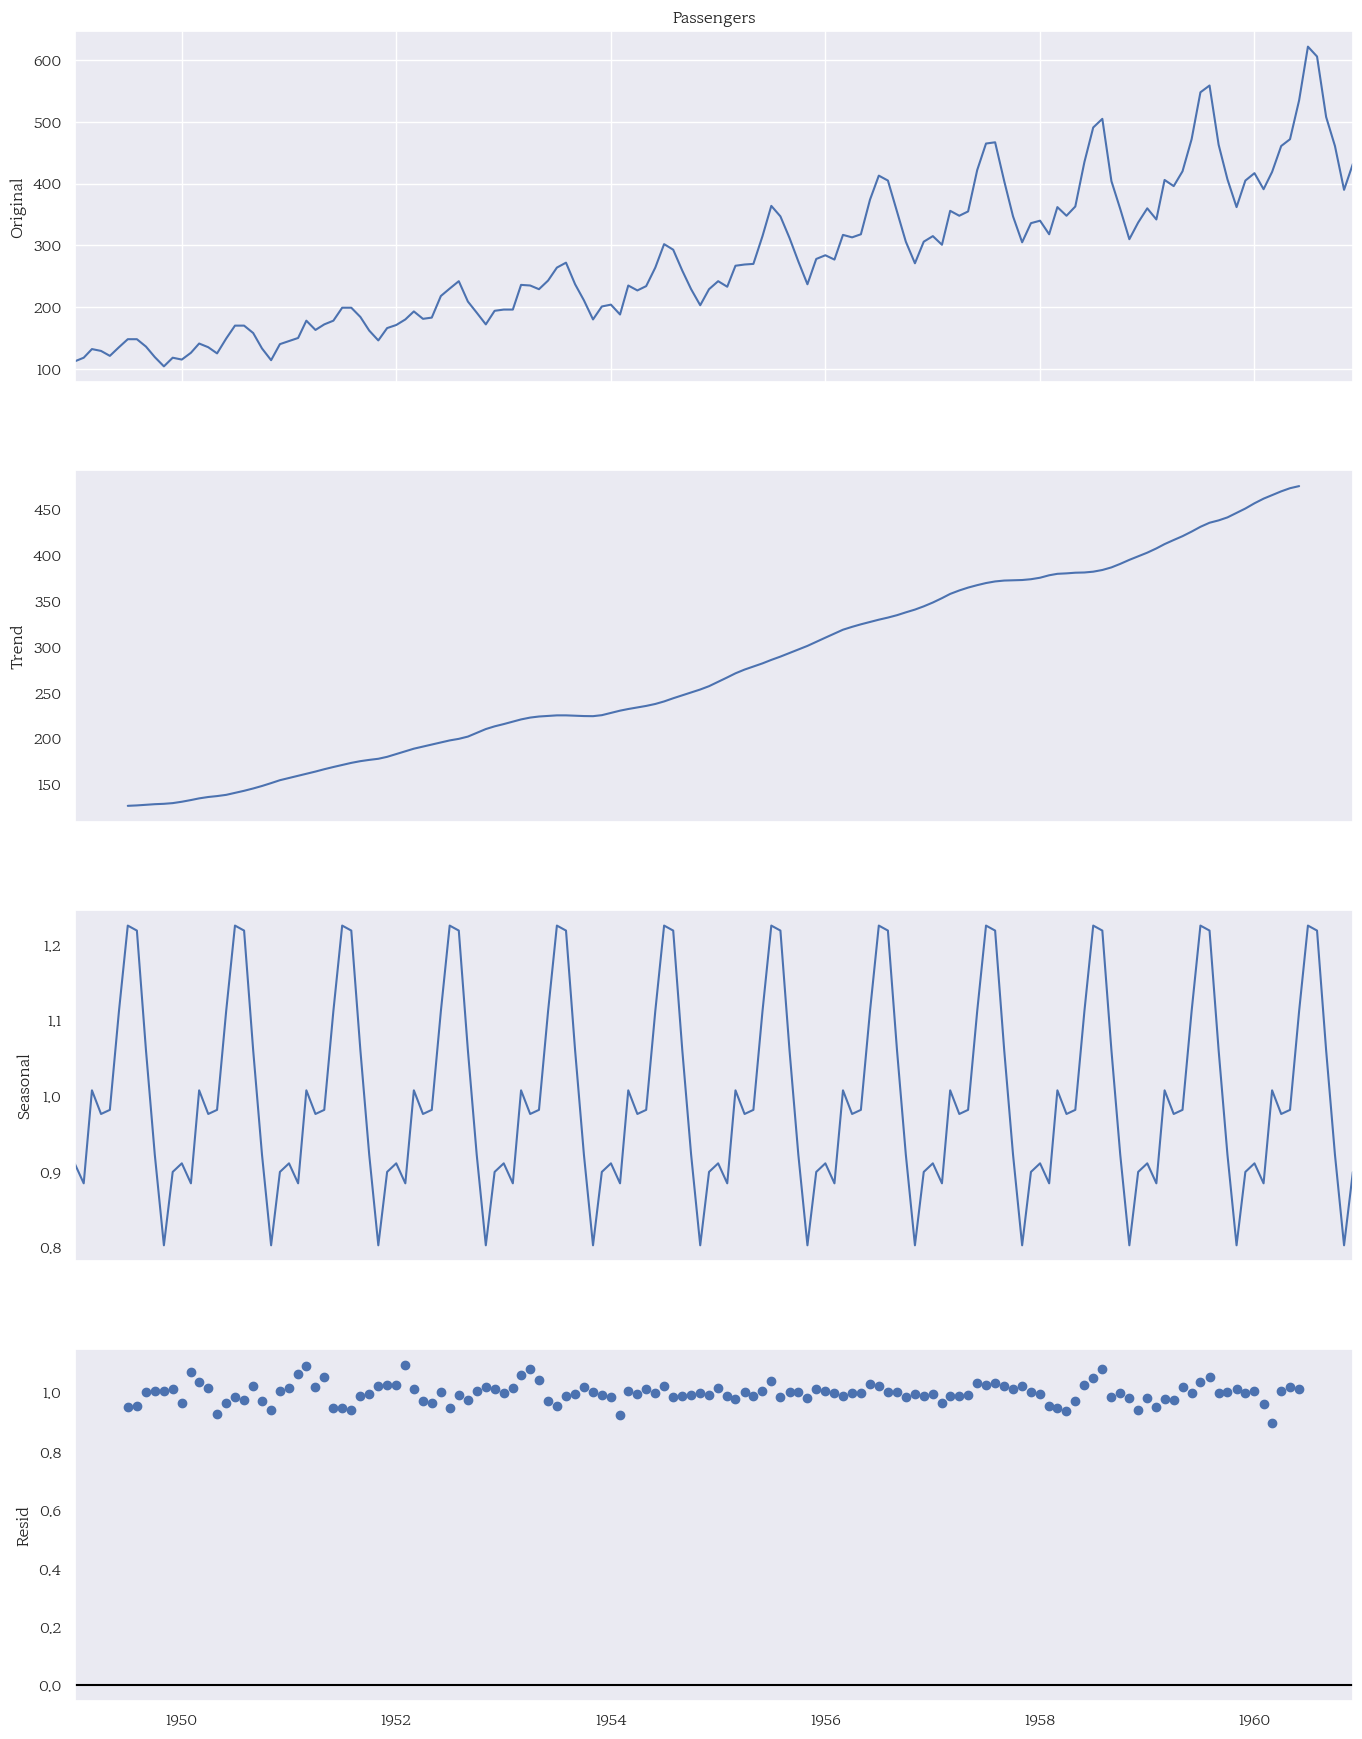

In [23]:
figure = sd.plot()
figure.set_size_inches((15,20))

fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel('Original')
ax1.grid(True)
ax1.grid(True)
ax1.grid(True)
ax1.grid(True)
plt.show()
plt.close()

# 통계적 시계열 분석
- ACF, PACF 테스트를 활용하여

In [33]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm 
import seaborn as sb
import numpy as np
from pandas import DataFrame
from hossam import load_data

# ADF 테스트 - 정상성 확인용
from statsmodels.tsa.stattools import adfuller
# ACF, PACF 테스트
from statsmodels.tsa.stattools import acf, pacf
# ACF, PACF 시각화
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [35]:
origin = load_data('air_passengers')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata
데이터셋 크기: (144, 2)
열 개수: 2
행 개수: 144
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


,ADF Statistic,p-value,차수,result
0,0.815369,9.918802e-01,0,False
1,-2.829267,5.421329e-02,1,False
2,-16.384232,2.732892e-29,2,True


,Month,Passengers
2,-3 days,8.0
3,3 days,-17.0
4,-1 days,-5.0
5,1 days,22.0
6,-1 days,-1.0


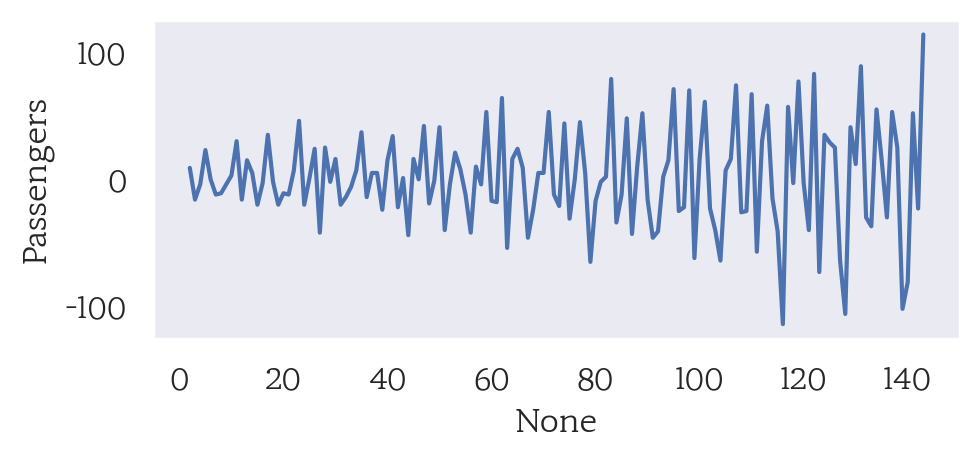

In [36]:
diff_df = origin.copy()
yname = 'Passengers'
diff_count = 0
result = []

while True:    
    ar = adfuller(diff_df[yname])
    ar_dict = {
        'ADF Statistic': ar[0],
        'p-value': ar[1],
        '차수': diff_count,
        'result': True if ar[1] <= 0.05 else False
    }

    # 리스트에 정상성 검사 결과를 저장
    result.append(ar_dict)


    # 정상성 충족이라면 반복 중단
    if ar_dict['result']:
        break
    # 정상성 충족 안되면 차분 수행 후 다시 수행
    diff_count += 1
    diff_df = diff_df.diff().dropna()

# 차분 결과표
display(DataFrame(result))

# 차분 결과로 생성된 데이터프레임
display(diff_df.head())

 # 시계열 그래프
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
    
# 그래프 그리기, seaborn 사용
sb.lineplot(data = diff_df, x= diff_df.index, y = yname)
    
# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김   
# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

## ACF 검정

In [37]:
# 1. 차분된 시계열의 자기상관계수(ACF) 계산 (lag 0부터 시작)
acf_vals = acf(diff_df['Passengers'])

# 2. ACF 유의성 판단 기준 (근사적 95% 신뢰구간)
threshold = 2 / np.sqrt(len(diff_df['Passengers']))

# 3. 임계값을 초과하는(유의한) lag 인덱스 추출
significant_lags = np.where(np.abs(acf_vals) > threshold)[0]

# 4. 결과 확인
acf_vals, threshold, significant_lags

(array([ 1.        , -0.19100587, -0.19598169, -0.0485473 , -0.20664662,
         0.11939696,  0.02575129,  0.14558204, -0.22613908,  0.01407533,
        -0.2082756 , -0.12089977,  0.78224898, -0.09592873, -0.19547382,
        -0.07034343, -0.14794844,  0.11319557,  0.01921939,  0.13695131,
        -0.24015233,  0.02613065]),
 np.float64(0.16783627165933782),
 array([ 0,  1,  2,  4,  8, 10, 12, 14, 20]))

In [48]:
# 1 ACF 계산
acf_vals = acf(diff_df['Passengers'])
threshold = 2 / np.sqrt(len(diff_df['Passengers']))

# 2 결과표 생성
df_acf = DataFrame({
    'lag': np.arange(len(acf_vals)),
    'acf': acf_vals
})

# 3 유의성 판단
df_acf['abs_acf'] = df_acf['acf'].abs()
df_acf['significant'] = df_acf['abs_acf'] > threshold

# 4 보기 좋게 정리
df_acf['acf'] = df_acf['acf'].round(3)
df_acf['abs_acf'] = df_acf['abs_acf'].round(3)
df_acf['threshold'] = round(threshold, 3)

# 5 lag=0 제외 (판정용)
df_acf_result = df_acf.query('lag > 0').reset_index(drop = True)

# 6 연속 유의 구간 계산
df_acf_result['prev_significant'] = df_acf_result['significant'].shift(1)

df_acf_result['cut_candidate'] = (
    (df_acf_result['prev_significant'] == True) &
    (df_acf_result['significant'] == False)
)

df_acf_result[['lag','acf','significant','cut_candidate']]

df_acf_result

,lag,acf,abs_acf,significant,threshold,prev_significant,cut_candidate
0,1,-0.191,0.191,True,0.168,NaN,False
1,2,-0.196,0.196,True,0.168,True,False
2,3,-0.049,0.049,False,0.168,True,True
3,4,-0.207,0.207,True,0.168,False,False
4,5,0.119,0.119,False,0.168,True,True
5,6,0.026,0.026,False,0.168,False,False
6,7,0.146,0.146,False,0.168,False,False
7,8,-0.226,0.226,True,0.168,False,False
8,9,0.014,0.014,False,0.168,True,True
9,10,-0.208,0.208,True,0.168,False,False


## ACF Plot

In [49]:
q_candidate = (
    df_acf_result
    .loc[df_acf_result['cut_candidate'], 'lag']
    .min() - 1
)

q_candidate

np.int64(2)

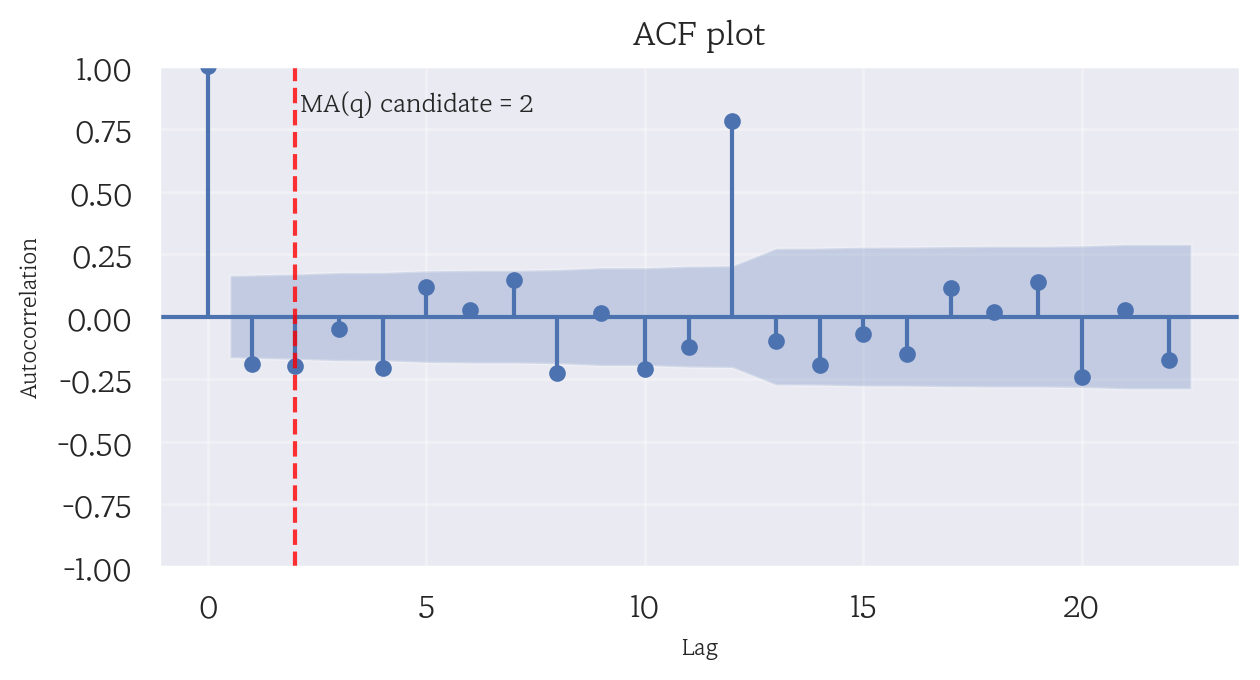

In [54]:
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 700# 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# ACF plot 그리기
plot_acf(diff_df['Passengers'], ax=ax)

# MA(q) 후보 시각화 
ax.axvline(
    x=q_candidate,
    linestyle ='--',
    linewidth =1.5,
    alpha = 0.8,
    color=  'red'  
 )
ax.text(
    q_candidate + 0.1,
    ax.get_ylim()[1] * 0.9,
    f'MA(q) candidate = {q_candidate}',
    fontsize = 9,
    verticalalignment = 'top'
 )
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김
ax.set_title('ACF plot', fontsize = 12, pad = 8)
ax.set_xlabel('Lag', fontsize = 8, labelpad = 5)
ax.set_ylabel('Autocorrelation', fontsize = 8, labelpad = 5)

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

## PACF

In [57]:
# 1 PACF 계산
pacf_vals = pacf(diff_df['Passengers'])
threshold = 2 / np.sqrt(len(diff_df['Passengers']))

# 2 결과표 생성
df_pacf = DataFrame({
    'lag': np.arange(len(pacf_vals)),
    'pacf': pacf_vals
})

# 3 유의성 판단
df_pacf['abs_pacf'] = df_pacf['pacf'].abs()
df_pacf['significant'] = df_pacf['abs_pacf'] > threshold

# 4 보기 좋게 정리
df_pacf['pacf'] = df_pacf['pacf'].round(3)
df_pacf['abs_pacf'] = df_pacf['abs_pacf'].round(3)
df_pacf['threshold'] = round(threshold, 3)

# 5 lag=0 제외 (판정용)
df_pacf_result = df_pacf.query('lag > 0').reset_index(drop = True)

# 6 연속 유의 구간 계산
df_pacf_result['prev_significant'] = df_pacf_result['significant'].shift(1)

df_pacf_result['cut_candidate'] = (
    (df_pacf_result['prev_significant'] == True) &
    (df_pacf_result['significant'] == False)
)

df_pacf_result[['lag','pacf','significant','cut_candidate']]

df_pacf_result

,lag,pacf,abs_pacf,significant,threshold,prev_significant,cut_candidate
0,1,-0.192,0.192,True,0.168,NaN,False
1,2,-0.245,0.245,True,0.168,True,False
2,3,-0.159,0.159,False,0.168,True,True
3,4,-0.355,0.355,True,0.168,False,False
4,5,-0.112,0.112,False,0.168,True,True
5,6,-0.169,0.169,True,0.168,False,False
6,7,0.078,0.078,False,0.168,True,True
7,8,-0.329,0.329,True,0.168,False,False
8,9,-0.075,0.075,False,0.168,True,True
9,10,-0.596,0.596,True,0.168,False,False


In [58]:
p_candidate = (
    df_pacf_result
    .loc[df_pacf_result['cut_candidate'], 'lag']
    .min() - 1
)

p_candidate


np.int64(2)

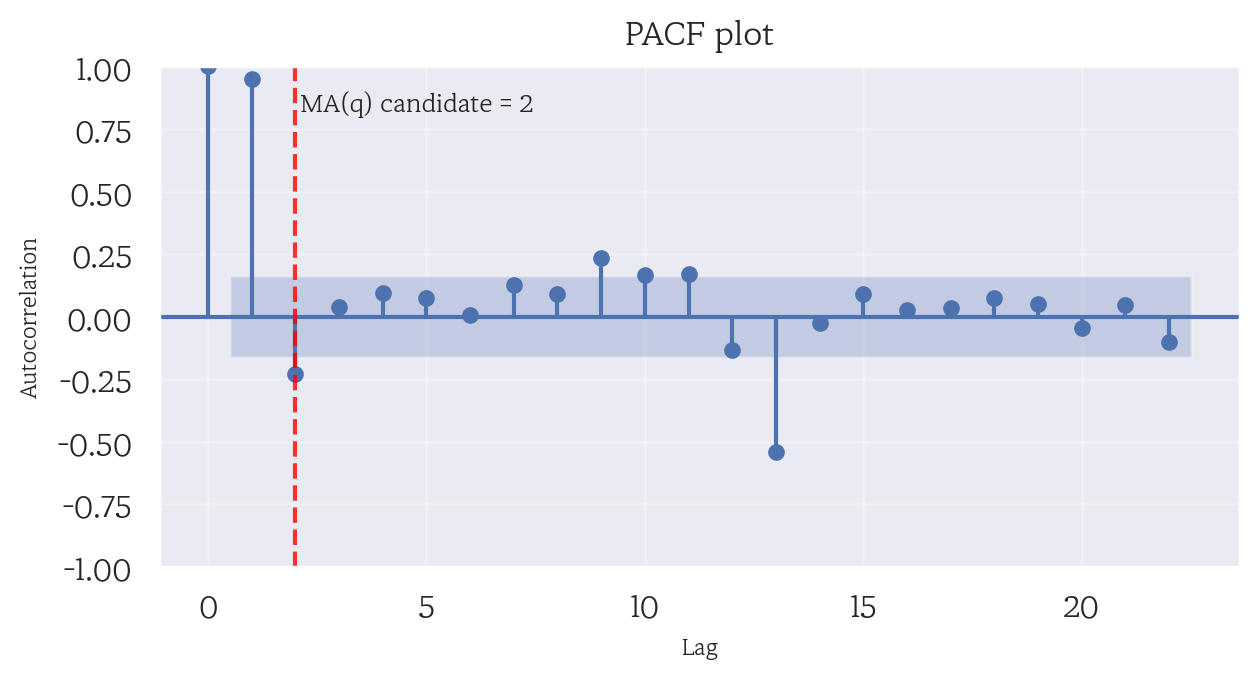

In [60]:
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 700# 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# PACF plot 그리기
plot_pacf(origin['Passengers'], ax=ax)

# MA(q) 후보 시각화 
ax.axvline(
    x=p_candidate,
    linestyle ='--',
    linewidth =1.5,
    alpha = 0.8,
    color=  'red'  
 )
ax.text(
    p_candidate + 0.1,
    ax.get_ylim()[1] * 0.9,
    f'MA(q) candidate = {p_candidate}',
    fontsize = 9,
    verticalalignment = 'top'
 )
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김
ax.set_title('PACF plot', fontsize = 12, pad = 8)
ax.set_xlabel('Lag', fontsize = 8, labelpad = 5)
ax.set_ylabel('Autocorrelation', fontsize = 8, labelpad = 5)

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

## ACF, PACF 결과종합

In [62]:
for i in range(0, p+1):
    for i in range(0, p+1):
        ARIMA(i,2,j)

NameError: name 'p' is not defined